# **Support vector machine:** 
>SVM for regression (SVR)

SVR is a type of `Support Vector Machine` that is able to `fit a linear model to the data`. 

The main idea is to find the best fitting line that has the `maximum margin` and at the same time the sum of the distances between the points and the line are less than a threshold.

In [9]:
# importing the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor




In [2]:
# load the california dataset:
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing()

In [3]:
# add the feature and target column:
X = df.data
y = df.target


In [4]:
# split the dataset into training and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# call the model:
model = SVR()

# fit the model:
model.fit(X_train, y_train)

# make the prediction:
y_pred = model.predict(X_test)

In [6]:
# calculate the metrics:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Explained Variance Score: {evs}")


Mean Squared Error: 1.3320115421348744
R2 Score: -0.01648536010717372
Mean Absolute Error: 0.8599506583445758
Explained Variance Score: 0.03192893601015778


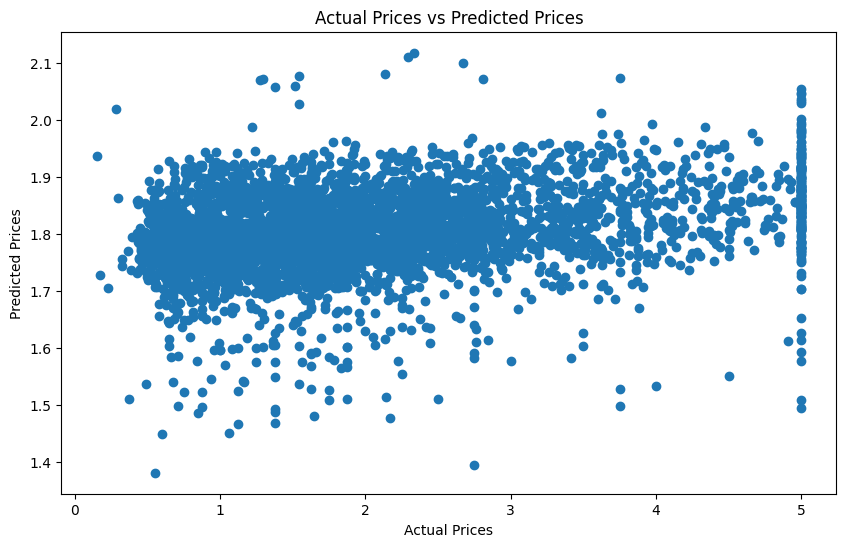

In [7]:
# plot the results:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, marker='o')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection
selector = SelectKBest(score_func=f_regression, k='all')
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

In [13]:
#Train and evaluate Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_selected, y_train)
y_pred_gb = gb_model.predict(X_test_selected)

# Evaluate Gradient Boosting model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
explained_variance_gb = explained_variance_score(y_test, y_pred_gb)

print("\nGradient Boosting Regressor Results")
print(f'Mean Squared Error: {mse_gb}')
print(f'R-squared: {r2_gb}')
print(f'Mean Absolute Error: {mae_gb}')
print(f'Explained Variance Score: {explained_variance_gb}')


Gradient Boosting Regressor Results
Mean Squared Error: 0.29399901242474274
R-squared: 0.7756433164710084
Mean Absolute Error: 0.37165044848436773
Explained Variance Score: 0.7756433483900506


## Let's visualize the model performance:

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# Plotting function for residuals and predictions
def plot_residuals_predictions(y_test, y_pred, model_name):
    # Residuals plot
    residuals = y_test - y_pred
    plt.figure(figsize=(12, 5))
    
    # Residuals
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot for {gb_model}')
    


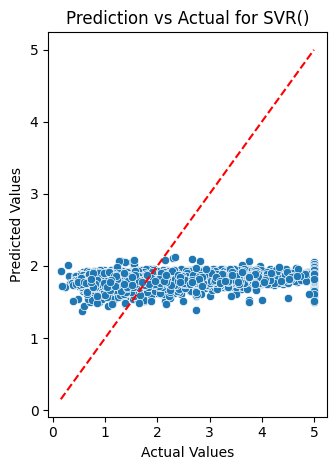

In [20]:
# Predictions vs Actuals
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Prediction vs Actual for {model}')
    
plt.tight_layout()
plt.show()

# Plotting function for feature importance (only for ensemble models)
def plot_feature_importances(model, X_train, model_name):
    result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2)
    sorted_idx = result.importances_mean.argsort()
    plt.figure(figsize=(10, 8))
    plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=[df.feature_names[i] for i in sorted_idx])
    plt.title(f"Permutation Importance of Features for {gb_model}")
    plt.show()



C:\Users\Muhammad Faizan\AppData\Local\Temp\ipykernel_11352\2372108317.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=[df.feature_names[i] for i in sorted_idx])


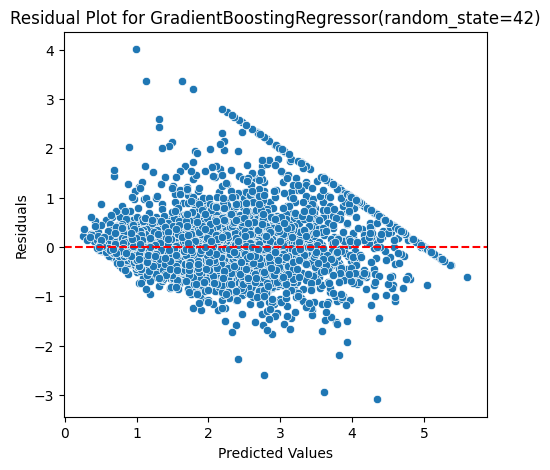

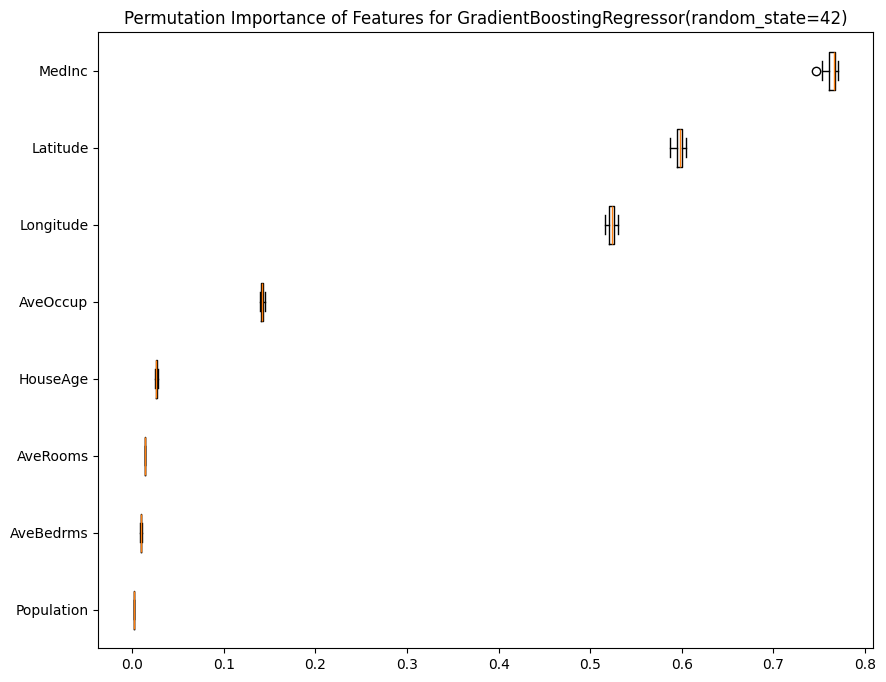

In [22]:
# Visualize Gradient Boosting Regressor model
plot_residuals_predictions(y_test, y_pred_gb, "Gradient Boosting Regressor")
plot_feature_importances(gb_model, X_train_selected, "Gradient Boosting Regressor")

---

So we learned how to use the SVR model, now let's see how it performs on a dataset.


---

# About Me:

<img src="https://scontent.flhe6-1.fna.fbcdn.net/v/t39.30808-6/449152277_18043153459857839_8752993961510467418_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=127cfc&_nc_ohc=6slHzGIxf0EQ7kNvgEeodY9&_nc_ht=scontent.flhe6-1.fna&oh=00_AYCiVUtssn2d_rREDU_FoRbXvszHQImqOjfNEiVq94lfBA&oe=66861B78" width="30%">

**Muhammd Faizan**

3rd Year BS Computer Science student at University of Agriculture, Faisalabad.\
Contact me for queries/collabs/correction

[Kaggle](https://www.kaggle.com/faizanyousafonly/)\
[Linkedin](https://www.linkedin.com/in/mrfaizanyousaf/)\
[GitHub](https://github.com/faizan-yousaf/)\
[Email] faizan6t45@gmail.com or faizanyousaf815@gmail.com \
[Phone/WhatsApp]() +923065375389